# Poisson equation in 1D with Dirichlet/Robin boundary conditions

Here we solve the 1D Poisson equation 
$$
\Delta u = 2, \qquad x \in [-1, 1],
$$

with the Robin boundary conditions on the right boundary
$$
\frac{du}{dx} = u, \quad x=1,
$$
and Dirichlet boundary conditions on the left boundary
$$
𝑢(−1)=0.
$$
The exact solution is 
$$
𝑢(𝑥)=(𝑥+1)2.
$$

Please see DeepXDE [doc](https://deepxde.readthedocs.io/en/latest/demos/pinn_forward/poisson.1d.dirichletrobin.html) for fuller details.

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.000118 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [4.02e+00, 1.48e-02, 9.42e-04]    [4.00e+00, 1.48e-02, 9.42e-04]    [1.03e+00]    
1000      [1.90e-04, 4.99e-05, 3.30e-04]    [1.67e-04, 4.99e-05, 3.30e-04]    [4.41e-03]    
2000      [2.39e-05, 1.60e-06, 6.81e-06]    [2.34e-05, 1.60e-06, 6.81e-06]    [1.09e-03]    
3000      [1.71e-05, 8.16e-10, 2.95e-10]    [1.89e-05, 8.16e-10, 2.95e-10]    [4.50e-04]    
4000      [1.50e-05, 6.73e-07, 1.75e-06]    [1.71e-05, 6.73e-07, 1.75e-06]    [2.98e-04]    
5000      [1.71e-05, 4.22e-05, 4.70e-05]    [2.13e-05, 4.22e-05, 4.70e-05]    [2.48e-03]    
6000      [2.36e-04, 1.66e-04, 7.10e-04]    [2.59e-04, 1.66e-04, 7.10e-04]    [7.01e-03]    
7000      [7.26e-06, 1.16e-09, 2.23e-09]    [8.70e-06, 1.16e-09, 2.23e-09]    [3.09e-04]    
8000      [5.73e-06, 8.57e-07, 2.83e-06]    [6.31e-06, 8.57e-07, 2.83e-06]    [7.01e-04]    
9000 

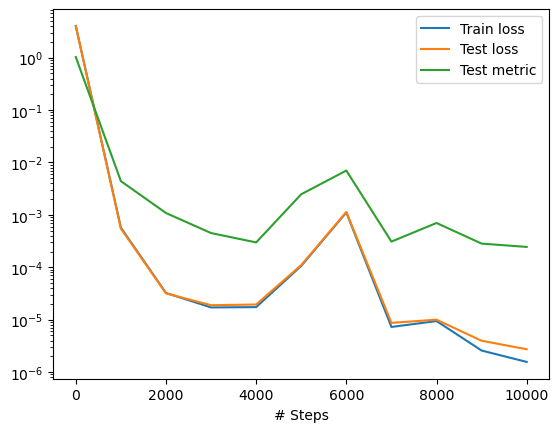

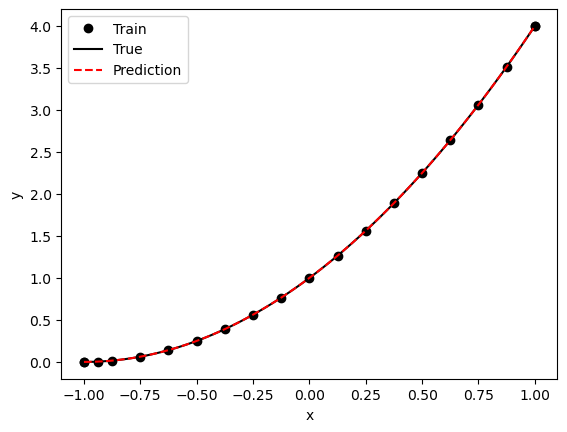

In [1]:
import deepxde as dde
import numpy as np


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    return dy_xx - 2


def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], -1)


def boundary_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)


def func(x):
    return (x + 1) ** 2


geom = dde.geometry.Interval(-1, 1)
bc_l = dde.icbc.DirichletBC(geom, func, boundary_l)
bc_r = dde.icbc.RobinBC(geom, lambda X, y: y, boundary_r)
data = dde.data.PDE(geom, pde, [bc_l, bc_r], 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)